In [26]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
from pandas_datareader import data as web
import seaborn as sb
import sys

sys.path.append("..")

import utils.getStockData as stockData

# APPLE Stock Price Analysis

In [30]:
startDate = '2017-12-01'
endDate = '2022-03-18'

def getStock(ticker, start, end):
    data = web.DataReader(f"{ticker}", "yahoo", start, end)
    data[f"{ticker}"] = data["Close"]
    data = data[[f"{ticker}"]]
    return data

aapl = getStock("AAPL", startDate, endDate)
aapl = aapl[1:]  #start from Dec 2017

aapl

,AAPL
Date,
2017-12-01,42.762501
2017-12-04,42.450001
2017-12-05,42.410000
2017-12-06,42.252499
2017-12-07,42.330002
...,...
2022-03-14,150.619995
2022-03-15,155.089996
2022-03-16,159.589996


Text(0.5, 1.0, 'AAPL Monthly Close Price')

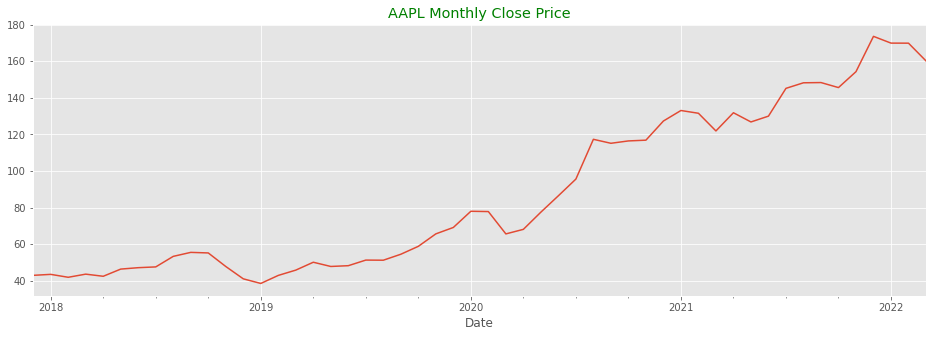

In [16]:
plt.style.use('ggplot')

aapl.plot(legend=False, figsize=(16, 5))
plt.title('AAPL Monthly Close Price')

## Rolling Mean and Variance

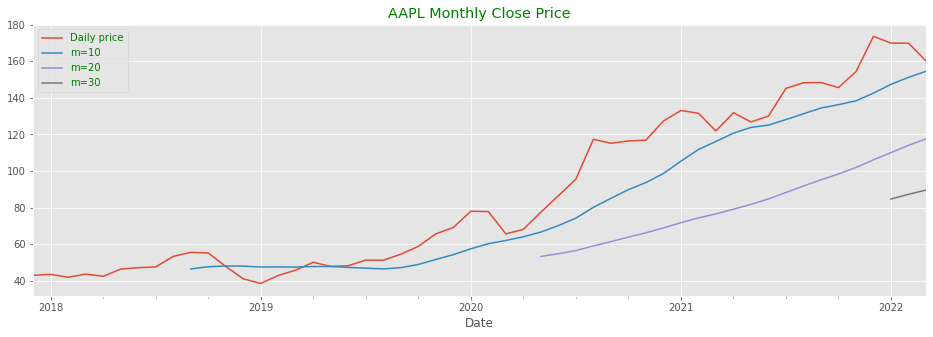

In [17]:
ax = aapl.plot(legend=False, figsize=(16, 5))
ax.set_title('AAPL Monthly Close Price')

aapl.rolling(window=10).mean().plot(ax=ax)
aapl.rolling(window=30).mean().plot(ax=ax)
aapl.rolling(window=50).mean().plot(ax=ax)
ax.legend(['Daily price', 'm=10', 'm=20', 'm=30'])